In [1]:
# Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../02 Data/modeling.csv")

In [3]:
X = df.set_index("Geography")
y = X.pop("311_index_per_property")

In [4]:
X

,his_num_311_per_property,neighbor_his_num_per_property,snow_depth,percent_below_poverty,percent_civilian_unemployed,per_capita_income,percent_no_highschool,percent_65older,percent_17younger,percent_household_disability,...,percent_notwell_english,percent_singleunits,percent_multiunit,percent_mobile_homes,percent_owneroccupiedunit,percent_crowding,percent_group_quarters,median_year_properties_built,median_value_properties_built,percent_no_vehicle
Geography,,,,,,,,,,,,,,,,,,,,,
360290001101,26.511628,30.289854,150.887612,0.147147,0.025063,24233,0.113924,0.225373,0.125373,0.496622,...,0.000000,0.503125,0.000000,0.00000,0.804054,0.000000,0.007463,1926.0,84000.0,0.000000
360290001102,22.717149,31.524310,144.951743,0.114962,0.121622,20756,0.053812,0.163990,0.387151,0.384793,...,0.000000,0.797546,0.000000,0.00000,0.702765,0.069124,0.000000,1930.0,84000.0,0.225806
360290001103,46.311475,32.054695,138.311245,0.128906,0.035519,21980,0.136915,0.180990,0.218750,0.221865,...,0.000000,0.664251,0.000000,0.00000,0.540193,0.000000,0.000000,1910.0,63000.0,0.070740
360290002001,42.962963,37.672279,141.764165,0.153184,0.194508,19691,0.190551,0.055938,0.453528,0.126649,...,0.005988,0.146789,0.000000,0.00000,0.356201,0.042216,0.005164,1920.0,76000.0,0.155673
360290002002,28.082192,35.043359,142.996062,0.271845,0.108824,22876,0.019157,0.208738,0.032362,0.301948,...,0.088816,0.320755,0.000000,0.02965,0.314935,0.000000,0.000000,1910.0,77000.0,0.324675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360290171001,40.116279,50.141822,80.750517,0.538168,0.155963,20461,0.330808,0.039440,0.292621,0.100000,...,0.000000,0.287234,0.212766,0.00000,0.356000,0.000000,0.000000,1890.0,72000.0,0.240000
360290171002,60.698690,53.177776,79.773379,0.464959,0.053996,14444,0.166417,0.070836,0.407687,0.202673,...,0.065587,0.210421,0.000000,0.00000,0.251670,0.000000,0.000000,1900.0,84500.0,0.236080
360290171003,59.836066,67.426314,81.874738,0.228873,0.054054,26053,0.103704,0.065141,0.255282,0.150470,...,0.015123,0.181208,0.042506,0.00000,0.263323,0.037618,0.000000,1900.0,100000.0,0.429467


In [5]:
y

Geography
360290001101    10.697674
360290001102     6.458797
360290001103    11.065574
360290002001     7.777778
360290002002    11.986301
                  ...    
360290171001     8.139535
360290171002    13.537118
360290171003     9.836066
360290171004     5.882353
360290171005     8.620690
Name: 311_index_per_property, Length: 286, dtype: float64

<Axes: >

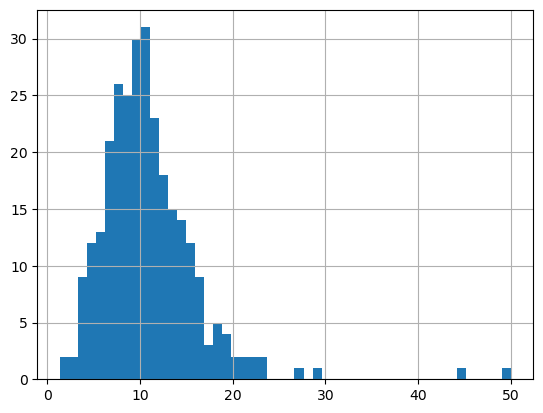

In [6]:
y.hist(bins=50)

In [7]:
len(X),len(X.columns), len(y)

(286, 22, 286)

In [8]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

### SVM RBF

In [9]:
y_rf_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(X):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)
    
    svr_rbf = svm.SVR(kernel='rbf', C=100, epsilon=1)
    svr_rbf.fit(scaled_X_train, y_train)

    y_train_pred = svr_rbf.predict(scaled_X_train).flatten()
    r2_train = r2_score(y_train, y_train_pred)

    this_y_predict = svr_rbf.predict(scaled_X_test).flatten()

    y_rf_predict = y_rf_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    print(r2_score(y_test, this_y_predict))
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [  5   9  33  45  56  73  79 109 111 124 143 146 155 170 185 196 200 212
 217 220 227 233 251 265 267 268 274 275 283]
0.3052523618740488
TEST: [  6  22  24  30  42  46  60  63  75  77  84  92  93 116 147 164 175 177
 181 193 203 204 207 211 221 234 240 249 269]
0.044034897126352446
TEST: [ 10  15  16  18  19  25  37  66  67  68  82  86  90 112 113 117 120 125
 139 144 154 159 165 202 219 246 250 255 258]
-0.021344965360410306
TEST: [  2  31  38  55  57  69  78  97 101 104 108 114 119 126 132 148 152 167
 173 184 206 218 224 232 254 264 272 277 281]
-0.047384599144971284
TEST: [ 12  29  35  65  74  76  85  96 107 115 118 127 137 140 157 158 168 172
 176 179 183 192 194 216 223 238 239 278 284]
-0.24303231506731415
TEST: [  0  11  26  28  36  41  51  61  95  98 100 136 141 142 150 178 180 186
 195 210 215 225 226 231 242 256 263 266 279]
0.07521966657195156
TEST: [  4  23  27  32  40  44  62  64  70 122 123 128 135 138 153 156 162 182
 197 208 209 229 236 247 253 271 276 282]
0.06

In [10]:
rf_rmse = mean_squared_error(y_true , y_rf_predict, squared=False)
rf_r2 = r2_score(y_true, y_rf_predict)
avg_r_squared = avg_r_squared/10
print("RMSE: "+str(rf_rmse))
print("R2: "+str(rf_r2))

RMSE: 5.0299331796567825
R2: 0.10639628246193922


C:\Users\ryanz\anaconda3\envs\blizzard\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.36986301369863
50.0
3.5519667613853123
35.06368157326685


<Figure size 1000x800 with 0 Axes>

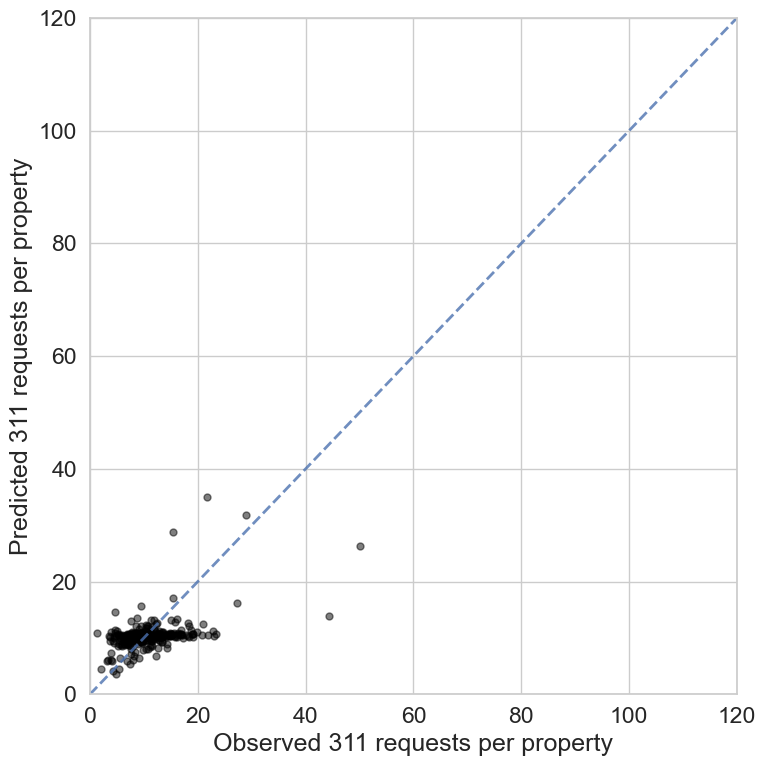

In [17]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed 311 requests per property')
    plt.ylabel('Predicted 311 requests per property')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_predict))
print(np.max(y_rf_predict))

#scatter plot
lims = [0, 120]
prediction_scatter(y_true, y_rf_predict, lims, "")
plt.tight_layout()

### SVM POLY

In [12]:
y_rf_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(X):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)
    
    svr_poly = svm.SVR(kernel='poly', C=1, epsilon=1)
    svr_poly.fit(scaled_X_train, y_train)

    this_y_predict = svr_poly.predict(scaled_X_test).flatten()

    y_rf_predict = y_rf_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    print(r2_score(y_test, this_y_predict))
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [  5   9  33  45  56  73  79 109 111 124 143 146 155 170 185 196 200 212
 217 220 227 233 251 265 267 268 274 275 283]
0.052837977877923104
TEST: [  6  22  24  30  42  46  60  63  75  77  84  92  93 116 147 164 175 177
 181 193 203 204 207 211 221 234 240 249 269]
-0.021718344868961292
TEST: [ 10  15  16  18  19  25  37  66  67  68  82  86  90 112 113 117 120 125
 139 144 154 159 165 202 219 246 250 255 258]
0.20694651990547408
TEST: [  2  31  38  55  57  69  78  97 101 104 108 114 119 126 132 148 152 167
 173 184 206 218 224 232 254 264 272 277 281]
0.1921674309619188
TEST: [ 12  29  35  65  74  76  85  96 107 115 118 127 137 140 157 158 168 172
 176 179 183 192 194 216 223 238 239 278 284]
-0.20191141642665378
TEST: [  0  11  26  28  36  41  51  61  95  98 100 136 141 142 150 178 180 186
 195 210 215 225 226 231 242 256 263 266 279]
0.3129340640742432
TEST: [  4  23  27  32  40  44  62  64  70 122 123 128 135 138 153 156 162 182
 197 208 209 229 236 247 253 271 276 282]
0.03313

In [13]:
rf_rmse = mean_squared_error(y_true , y_rf_predict, squared=False)
rf_r2 = r2_score(y_true, y_rf_predict)
avg_r_squared = avg_r_squared/10

C:\Users\ryanz\anaconda3\envs\blizzard\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
print("RMSE: "+str(rf_rmse))
print("R2: "+str(rf_r2)) 

RMSE: 4.616168537551299
R2: 0.24736597363732882


1.36986301369863
50.0
3.5519667613853123
35.06368157326685


<Figure size 1000x800 with 0 Axes>

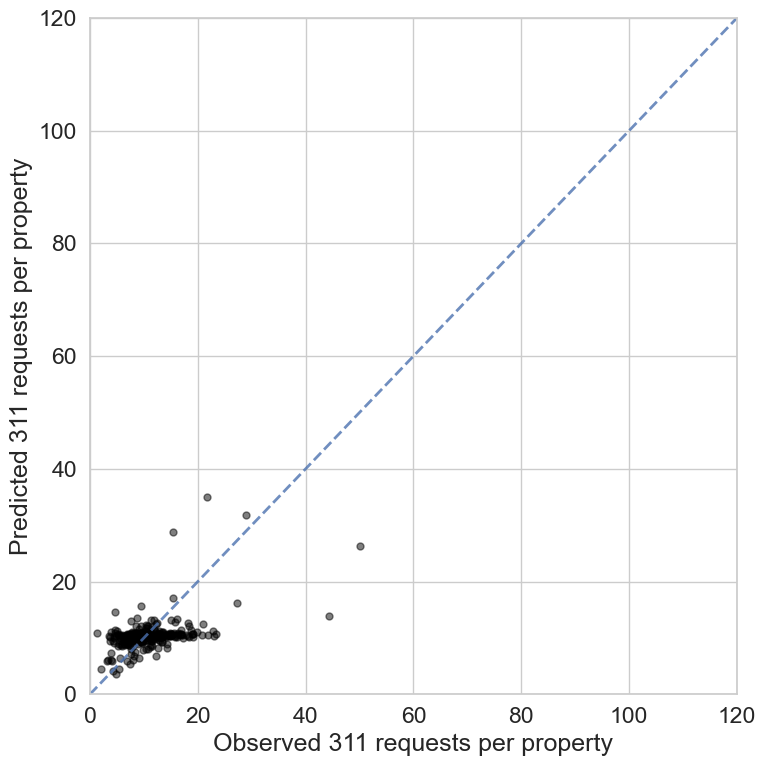

In [16]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed 311 requests per property')
    plt.ylabel('Predicted 311 requests per property')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_predict))
print(np.max(y_rf_predict))

#scatter plot
lims = [0, 120]
prediction_scatter(y_true, y_rf_predict, lims, "")
plt.tight_layout()